In [ ]:
print("hello")

hello


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

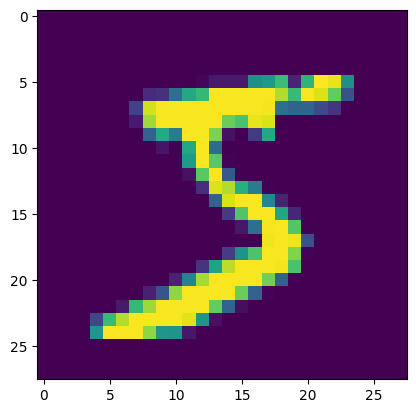

In [ ]:
plt.imshow(x_train[0])

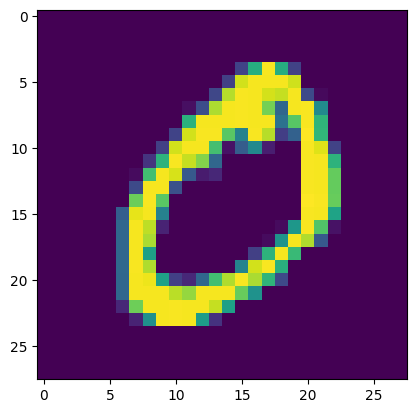

In [ ]:
plt.imshow(x_train[1])

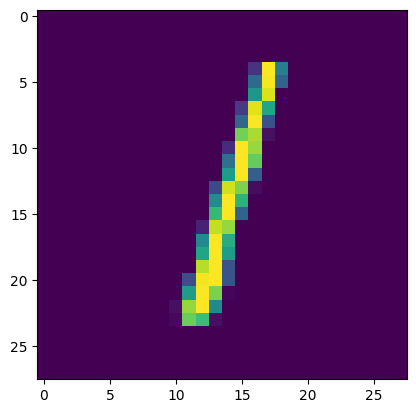

In [ ]:
plt.imshow(x_test[2])

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Define model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training Model
history=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8160 - loss: 7.3717 - val_accuracy: 0.8893 - val_loss: 0.4949
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9062 - loss: 0.3708 - val_accuracy: 0.9149 - val_loss: 0.3532
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9298 - loss: 0.2725 - val_accuracy: 0.9240 - val_loss: 0.3325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9395 - loss: 0.2331 - val_accuracy: 0.9395 - val_loss: 0.2651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9472 - loss: 0.2008 - val_accuracy: 0.9376 - val_loss: 0.3337


In [ ]:
# Accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.0889
Test accuracy: 0.9779000282287598


In [ ]:
from sklearn.metrics import  classification_report


In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


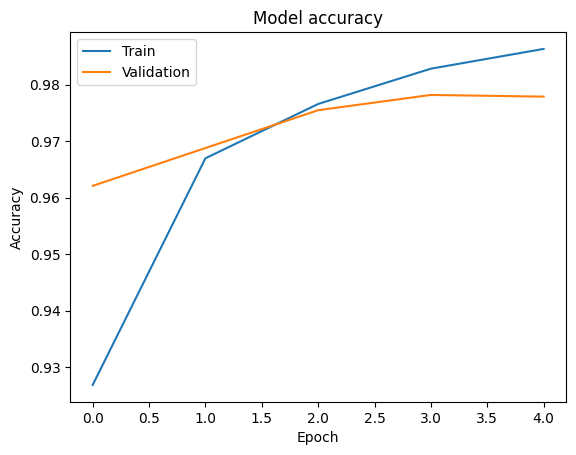

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

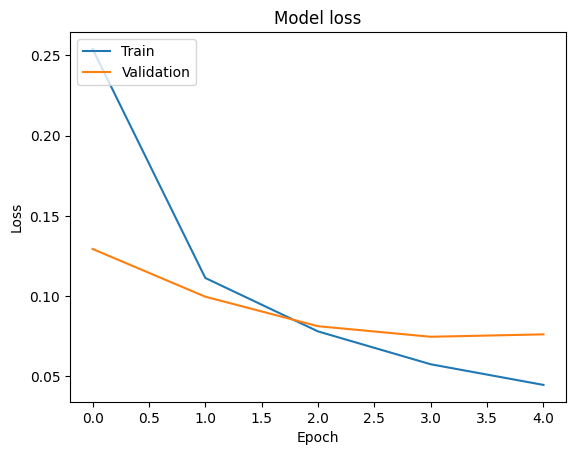

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Select 5 random images from the test set
num_images_to_test = 5
random_indices = np.random.choice(x_test.shape[0], num_images_to_test)
test_images = x_test[random_indices]
test_labels = y_test[random_indices]

In [ ]:
# Make predictions
predictions = model.predict(test_images)

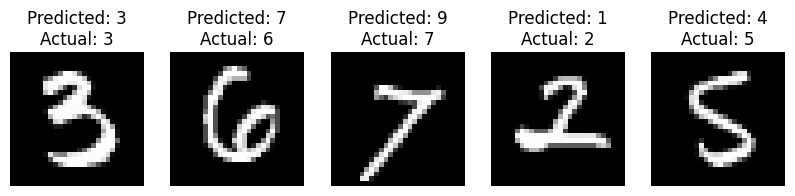

In [ ]:
# Display the images with predictions
plt.figure(figsize=(10, 5))
for i in range(num_images_to_test):
    plt.subplot(1, num_images_to_test, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(test_labels[i])}")
    plt.axis('off')

plt.show()

In [ ]:
# Modification told by sir

# Calculate the split indices
num_train = int(0.6 * len(x_train))
num_test = int(0.2 * len(x_train))

In [ ]:
# Split the training data
x_train_new, y_train_new = x_train[:num_train], y_train[:num_train]

In [ ]:
# Create the validation and test sets
x_val, y_val = x_train[num_train:num_train + num_test], y_train[num_train:num_train + num_test]
x_test_new, y_test_new = x_train[num_train + num_test:], y_train[num_train + num_test:]

In [ ]:
history=model.fit(x_train_new, y_train_new, epochs=5, batch_size=32, validation_data=(x_test_new, y_test_new))

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9640 - loss: 0.1422 - val_accuracy: 0.9490 - val_loss: 0.2466
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9669 - loss: 0.1269 - val_accuracy: 0.9519 - val_loss: 0.2346
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9667 - loss: 0.1326 - val_accuracy: 0.9542 - val_loss: 0.2215
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9688 - loss: 0.1267 - val_accuracy: 0.9503 - val_loss: 0.2990
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9664 - loss: 0.1383 - val_accuracy: 0.9551 - val_loss: 0.3087


In [ ]:
loss, accuracy = model.evaluate(x_test_new, y_test_new)
print('Test accuracy:', accuracy)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9508 - loss: 0.3381
Test accuracy: 0.9550833106040955


In [ ]:
num_images_to_test = 5
random_indices = np.random.choice(x_test.shape[0], num_images_to_test)
test_images = x_test_new[random_indices]
test_labels = y_test_new[random_indices]

In [ ]:
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


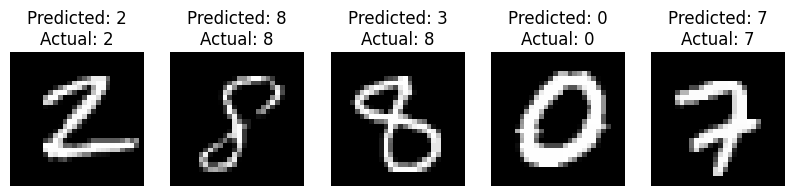

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(num_images_to_test):
    plt.subplot(1, num_images_to_test, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(test_labels[i])}")
    plt.axis('off')

plt.show()